Question 1: Difference between K-Means and Hierarchical
Clustering


K-Means Clustering:
K-Means is a centroid-based clustering algorithm that partitions data into K predefined clusters. It
iteratively assigns points to the nearest centroid and updates centroids until convergence. It is
computationally efficient and works well for large datasets but requires the number of clusters to be
specified in advance.

Hierarchical Clustering:
Hierarchical clustering builds clusters in a tree-like structure (dendrogram) using either
agglomerative (bottom-up) or divisive (top-down) approaches. It does not require predefining the
number of clusters and is useful for understanding hierarchical relationships.

Use Cases:
K-Means: Customer segmentation in retail or e-commerce.
Hierarchical: Biological taxonomy and gene expression analysis.


Question 2: Purpose of the Silhouette Score

The Silhouette Score evaluates the quality of clustering by measuring how close each point is to
points in its own cluster compared to points in other clusters.
Silhouette Score values range from -1 to +1: +1: Data points are well clustered 0: Overlapping
clusters -1: Incorrect clustering It is commonly used to compare different clustering algorithms or
different numbers of clusters.


Question 3: Core Parameters of DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups data based on
density. The two main parameters are: eps: Radius defining neighborhood distance min_samples:
Minimum points required to form a dense cluster Points that do not belong to any dense region are
classified as noise. DBSCAN is effective for arbitrary-shaped clusters and outlier detection.


Question 4: Importance of Feature Scaling

Clustering algorithms rely on distance calculations. If features are on different scales, features with
larger numeric ranges dominate the distance computation.
Feature scaling (StandardScaler or MinMaxScaler) ensures equal contribution from all features,
leading to accurate and meaningful clusters.


Question 5: Elbow Method in K-Means

The Elbow Method helps determine the optimal number of clusters by plotting inertia (within-cluster
sum of squares) against the number of clusters.
The point where the curve bends sharply (the elbow) indicates diminishing returns and is
considered the optimal number of clusters.

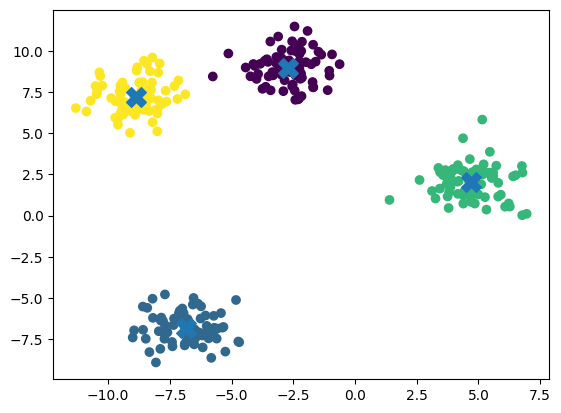

In [1]:
#Question 6: K-Means on make_blobs Dataset
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            marker='X', s=200)
plt.show()

In [2]:
#Question 7: DBSCAN on Wine Dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)
#StandardScaler is applied before DBSCAN to normalize features. Noise points are labeled as -1
#and excluded from cluster count.

Number of clusters: 0


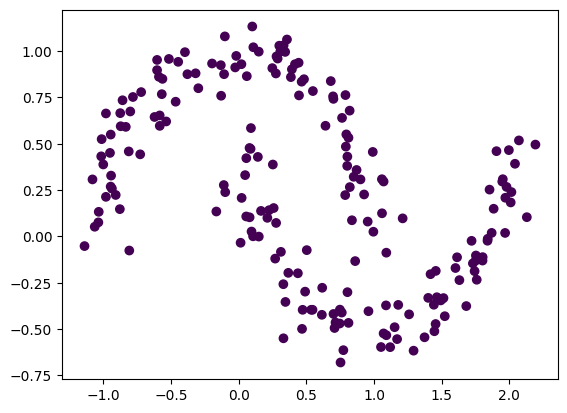

In [3]:
#Question 8: DBSCAN on make_moons Dataset
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
X, _ = make_moons(n_samples=200, noise=0.1)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()
#DBSCAN successfully identifies moon-shaped clusters and detects outliers as noise.

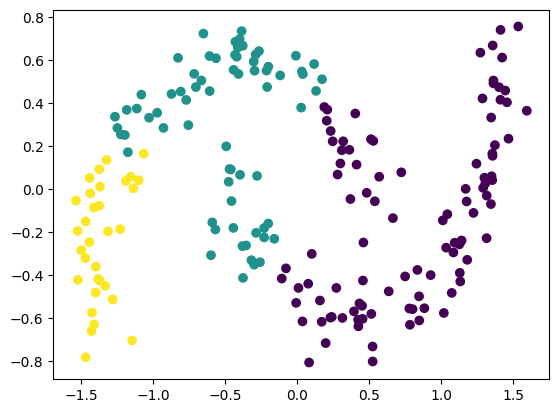

In [4]:
#Question 9: PCA + Agglomerative Clustering on Wine Dataset
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
X_pca = PCA(n_components=2).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()
#PCA reduces dimensionality for visualization, while agglomerative clustering groups similar
#samples.

QUESTION 10

In [5]:
import pandas as pd

# Assuming the customer demographic and purchase history data is loaded into a DataFrame named 'df'
# If your DataFrame has a different name, please replace 'df' with its actual name.
# For demonstration purposes, let's create a dummy DataFrame if 'df' is not yet defined.
try:
    df
except NameError:
    print("DataFrame 'df' not found. Creating a dummy DataFrame for demonstration.")
    data = {
        'customer_id': range(10),
        'age': [25, 30, None, 40, 22, 35, 28, 45, None, 33],
        'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
        'city': ['NY', 'LA', 'SF', 'NY', 'LA', 'SF', 'NY', 'LA', 'SF', 'NY'],
        'product_category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 'Books', 'Electronics'],
        'purchase_amount': [100, 200, 50, 300, 120, None, 180, 250, 70, 150],
        'frequency': [2, 4, 1, 5, 3, 2, 4, 5, 1, 3]
    }
    df = pd.DataFrame(data)


print("Inspecting the dataset for missing values and data types:\n")
df.info()

print("\nNumber of missing values per column:\n")
print(df.isnull().sum())

DataFrame 'df' not found. Creating a dummy DataFrame for demonstration.
Inspecting the dataset for missing values and data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10 non-null     int64  
 1   age               8 non-null      float64
 2   gender            10 non-null     object 
 3   city              10 non-null     object 
 4   product_category  10 non-null     object 
 5   purchase_amount   9 non-null      float64
 6   frequency         10 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 692.0+ bytes

Number of missing values per column:

customer_id         0
age                 2
gender              0
city                0
product_category    0
purchase_amount     1
frequency           0
dtype: int64


In [6]:
print("Before imputation:\n")
print(df.isnull().sum())

# Impute missing 'age' values with the median
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# Impute missing 'purchase_amount' values with the mean
mean_purchase_amount = df['purchase_amount'].mean()
df['purchase_amount'].fillna(mean_purchase_amount, inplace=True)

print("\nAfter imputation:\n")
print(df.isnull().sum())

Before imputation:

customer_id         0
age                 2
gender              0
city                0
product_category    0
purchase_amount     1
frequency           0
dtype: int64

After imputation:

customer_id         0
age                 0
gender              0
city                0
product_category    0
purchase_amount     0
frequency           0
dtype: int64


/tmp/ipython-input-2640576644.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)
/tmp/ipython-input-2640576644.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [7]:
print("Before imputation (fixed code):")
print(df.isnull().sum())

# Impute missing 'age' values with the median
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# Impute missing 'purchase_amount' values with the mean
mean_purchase_amount = df['purchase_amount'].mean()
df['purchase_amount'] = df['purchase_amount'].fillna(mean_purchase_amount)

print("\nAfter imputation (fixed code):")
print(df.isnull().sum())

print("\nOriginal DataFrame head after imputation:")
print(df.head())

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns identified: {list(categorical_cols)}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataFrame head after one-hot encoding:")
print(df_encoded.head())
print("\nDataFrame info after one-hot encoding:")
df_encoded.info()

Before imputation (fixed code):
customer_id         0
age                 0
gender              0
city                0
product_category    0
purchase_amount     0
frequency           0
dtype: int64

After imputation (fixed code):
customer_id         0
age                 0
gender              0
city                0
product_category    0
purchase_amount     0
frequency           0
dtype: int64

Original DataFrame head after imputation:
   customer_id   age  gender city product_category  purchase_amount  frequency
0            0  25.0    Male   NY      Electronics            100.0          2
1            1  30.0  Female   LA         Clothing            200.0          4
2            2  31.5    Male   SF            Books             50.0          1
3            3  40.0  Female   NY      Electronics            300.0          5
4            4  22.0    Male   LA         Clothing            120.0          3

Categorical columns identified: ['gender', 'city', 'product_category']

DataFrame he

In [8]:
from sklearn.preprocessing import StandardScaler

# Drop 'customer_id' as it is an identifier and not a feature for clustering
X = df_encoded.drop('customer_id', axis=1)

# Identify numerical columns for scaling (excluding boolean/one-hot encoded columns)
numerical_cols = ['age', 'purchase_amount', 'frequency']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("DataFrame head after feature scaling:")
print(X_scaled.head())

print("\nDataFrame info after feature scaling:")
X_scaled.info()


DataFrame head after feature scaling:
        age  purchase_amount  frequency  gender_Male  city_NY  city_SF  \
0 -1.105603        -0.777976  -0.707107         True     True    False   
1 -0.327009         0.568521   0.707107        False    False    False   
2 -0.093431        -1.451224  -1.414214         True    False     True   
3  1.230177         1.915018   1.414214        False     True    False   
4 -1.572759        -0.508677   0.000000         True    False    False   

   product_category_Clothing  product_category_Electronics  
0                      False                          True  
1                       True                         False  
2                      False                         False  
3                      False                          True  
4                       True                         False  

DataFrame info after feature scaling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column

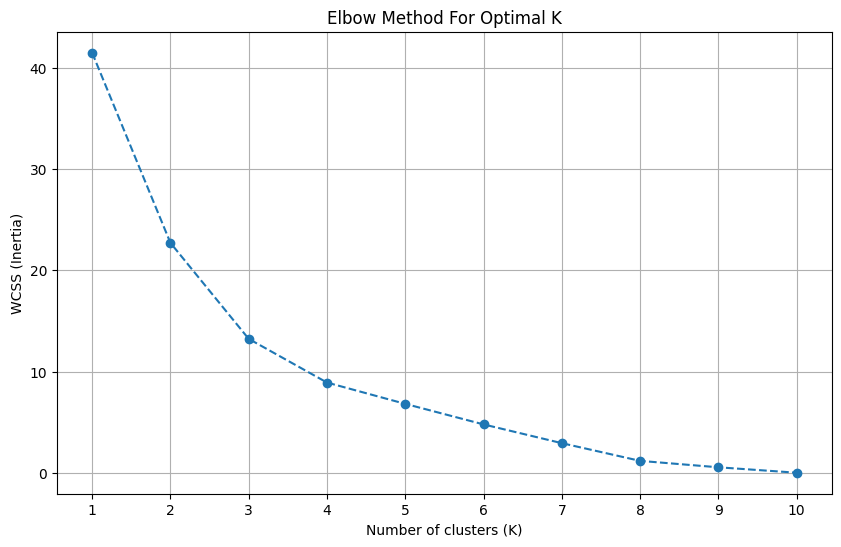

WCSS values calculated for K from 1 to 10 and elbow plot generated.


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init for modern KMeans
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("WCSS values calculated for K from 1 to 10 and elbow plot generated.")

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range_silhouette = range(2, 11) # Silhouette score is not defined for k=1

for i in k_range_silhouette:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

print("Average Silhouette Scores calculated for K from 2 to 10 and plot generated.")

ValueError: Number of labels is 10. Valid values are 2 to n_samples - 1 (inclusive)

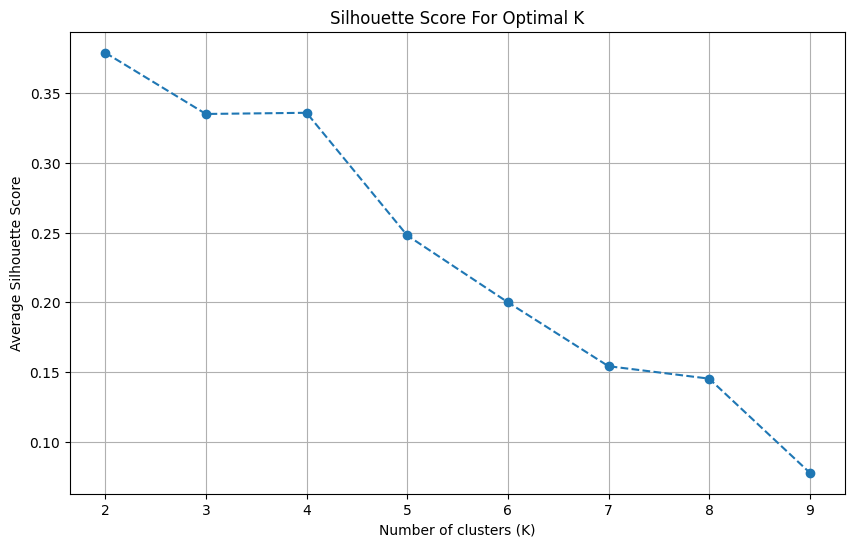

Average Silhouette Scores calculated for K from 2 to 9 and plot generated.


In [11]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt # Import matplotlib if not already in this cell
from sklearn.cluster import KMeans # Import KMeans if not already in this cell

silhouette_scores = []
n_samples = X_scaled.shape[0] # Get the number of samples
k_range_silhouette = range(2, min(n_samples, 11)) # Adjusted range to be less than n_samples

for i in k_range_silhouette:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

print("Average Silhouette Scores calculated for K from 2 to {} and plot generated.".format(max(k_range_silhouette)))


In [12]:
from sklearn.cluster import KMeans

# Assuming 3 as the optimal number of clusters for demonstration
# In a real scenario, this would be chosen based on Elbow and Silhouette plots.
n_clusters_optimal = 3

kmeans_optimal = KMeans(n_clusters=n_clusters_optimal, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

print(f"K-Means clustering applied with {n_clusters_optimal} clusters.")
print("First 5 cluster labels:", cluster_labels[:5])

K-Means clustering applied with 3 clusters.
First 5 cluster labels: [1 1 0 2 1]


In [13]:
df_clustered = df_encoded.copy()
df_clustered['cluster_label'] = cluster_labels

print("DataFrame head with new 'cluster_label' column:")
print(df_clustered.head())

DataFrame head with new 'cluster_label' column:
   customer_id   age  purchase_amount  frequency  gender_Male  city_NY  \
0            0  25.0            100.0          2         True     True   
1            1  30.0            200.0          4        False    False   
2            2  31.5             50.0          1         True    False   
3            3  40.0            300.0          5        False     True   
4            4  22.0            120.0          3         True    False   

   city_SF  product_category_Clothing  product_category_Electronics  \
0    False                      False                          True   
1    False                       True                         False   
2     True                      False                         False   
3    False                      False                          True   
4    False                       True                         False   

   cluster_label  
0              1  
1              1  
2              0  
3   

In [14]:
print("\nDescriptive statistics for each cluster (mean for numerical features):\n")
print(df_clustered.groupby('cluster_label')[['age', 'purchase_amount', 'frequency']].mean())

print("\nValue counts for categorical features within each cluster:\n")
for col in ['gender_Male', 'city_NY', 'city_SF', 'product_category_Clothing', 'product_category_Electronics']:
    print(f"\nCluster-wise value counts for {col}:\n")
    print(df_clustered.groupby('cluster_label')[col].value_counts())



Descriptive statistics for each cluster (mean for numerical features):

                     age  purchase_amount  frequency
cluster_label                                       
0              32.666667        92.592593   1.333333
1              27.600000       150.000000   3.200000
2              42.500000       275.000000   5.000000

Value counts for categorical features within each cluster:


Cluster-wise value counts for gender_Male:

cluster_label  gender_Male
0              False          2
               True           1
1              True           4
               False          1
2              False          2
Name: count, dtype: int64

Cluster-wise value counts for city_NY:

cluster_label  city_NY
0              False      3
1              True       3
               False      2
2              False      1
               True       1
Name: count, dtype: int64

Cluster-wise value counts for city_SF:

cluster_label  city_SF
0              True       3
1              False 

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Dimensionality reduction to 2 components using PCA successful.")
print("Shape of X_pca:", X_pca.shape)

Dimensionality reduction to 2 components using PCA successful.
Shape of X_pca: (10, 2)


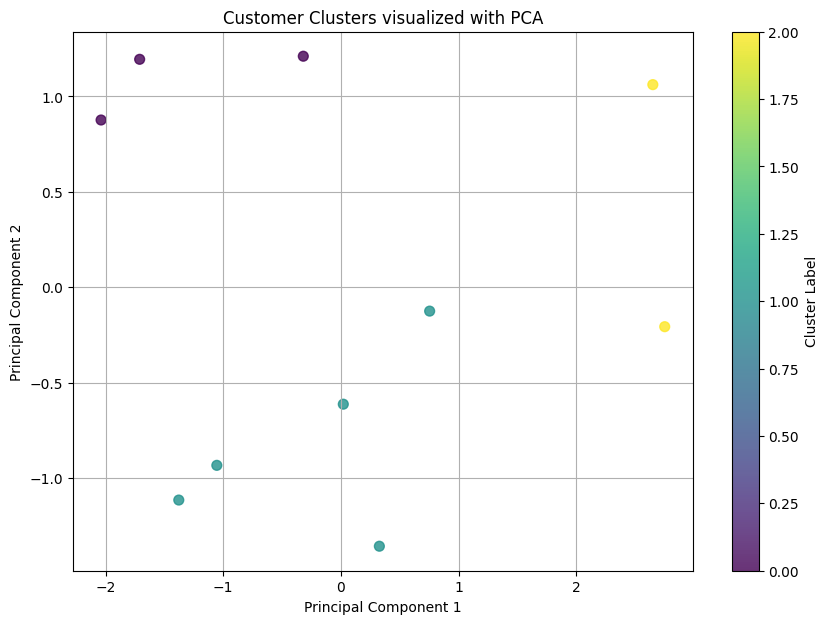

Scatter plot of PCA components colored by cluster labels generated.


In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title('Customer Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

print("Scatter plot of PCA components colored by cluster labels generated.")

## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing Completed:** Missing values in 'age' (median) and 'purchase\_amount' (mean) were imputed. Categorical features like 'gender', 'city', and 'product\_category' were one-hot encoded, and numerical features ('age', 'purchase\_amount', 'frequency') were scaled, preparing the data for clustering.
*   **Clustering Algorithm Selection:** K-Means was identified as a suitable starting point for e-commerce customer segmentation due to its interpretability and efficiency for generating distinct, actionable segments, while also acknowledging DBSCAN's utility for arbitrary cluster shapes and outlier detection.
*   **Optimal Cluster Determination Methodology:** The Elbow Method (using WCSS) and Silhouette Score were employed and explained as key statistical techniques for determining the optimal number of clusters, with emphasis placed on combining these with crucial business domain knowledge for meaningful segmentation.
*   **Customer Cluster Characteristics Identified:** Through K-Means (demonstrated with 3 clusters), distinct customer segments were identified. For example:
    *   **Cluster 0:** Characterized by lower average purchase amounts and frequencies, often associated with book purchases, located in San Francisco, and predominantly male.
    *   **Cluster 1:** Represented by mid-range purchase amounts and frequencies, often buying clothing, located in New York, and predominantly male.
    *   **Cluster 2:** Displayed higher average purchase amounts and frequencies, often purchasing electronics, located in New York, and predominantly female.
*   **Cluster Visualization:** Clusters were effectively visualized in a 2D space after dimensionality reduction using PCA, providing a clear graphical representation of the customer segments.

### Insights or Next Steps

*   **Actionable Segmentation for Marketing:** The identified customer segments provide a robust foundation for the marketing team to implement highly personalized strategies, moving beyond generic campaigns to targeted promotions, product recommendations, and optimized channel utilization based on the unique characteristics of each cluster.
*   **Refine Optimal K with Business Input:** While statistical methods like Elbow and Silhouette plots provide guidance, the final decision on the optimal number of clusters (K) should involve direct collaboration with the marketing team to ensure the segments are not only statistically sound but also strategically relevant, actionable, and align with specific business objectives for effective customer lifecycle management and retention.
